In [9]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

In [10]:
#load dataset
data = np.load('../input/known-faces/ORL_faces.npz') 

# load the Label of Images
x_train = data['trainX']
#normalize every image
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX']
#normalize every image
x_test = np.array(x_test,dtype='float32')/255

# load the Label of Images
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:]))
print('Y-train shape: {}'.format(y_train))
print('x_test shape: {}'.format(x_test.shape))

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

In [11]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

In [12]:
im_rows=112
im_cols=92
batch_size=256
im_shape=(im_rows, im_cols, 1)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape[0]))

x_train shape: 228
x_test shape: 160


In [13]:
model = Sequential()
model.add(Conv2D(36, kernel_size=7, input_shape=im_shape))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(54, kernel_size=5, input_shape=im_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(2024))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 106, 86, 36)       1800      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 106, 86, 36)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 24624)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2024)             

In [15]:
model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [16]:
## Training
history=model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Epoch 1/250
1/1 - 5s - loss: 3.0293 - accuracy: 0.0307 - val_loss: 3.0070 - val_accuracy: 0.0000e+00
Epoch 2/250
1/1 - 4s - loss: 3.0313 - accuracy: 0.0439 - val_loss: 3.0054 - val_accuracy: 0.0000e+00
Epoch 3/250
1/1 - 4s - loss: 3.0344 - accuracy: 0.0482 - val_loss: 3.0009 - val_accuracy: 0.0833
Epoch 4/250
1/1 - 4s - loss: 3.0249 - accuracy: 0.0570 - val_loss: 2.9971 - val_accuracy: 0.1667
Epoch 5/250
1/1 - 4s - loss: 3.0125 - accuracy: 0.0658 - val_loss: 2.9976 - val_accuracy: 0.1667
Epoch 6/250
1/1 - 4s - loss: 2.9969 - accuracy: 0.0702 - val_loss: 2.9972 - val_accuracy: 0.1667
Epoch 7/250
1/1 - 4s - loss: 2.9905 - accuracy: 0.0746 - val_loss: 2.9867 - val_accuracy: 0.0833
Epoch 8/250
1/1 - 4s - loss: 2.9390 - accuracy: 0.0658 - val_loss: 2.9758 - val_accuracy: 0.0833
Epoch 9/250
1/1 - 4s - loss: 2.9504 - accuracy: 0.0746 - val_loss: 2.9684 - val_accuracy: 0.0833
Epoch 10/250
1/1 - 4s - loss: 2.9829 - accuracy: 0.0614 - val_loss: 2.9605 - val_accuracy: 0.2500
Epoch 11/250
1/1 - 4s

Epoch 85/250
1/1 - 4s - loss: 0.0699 - accuracy: 0.9912 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 86/250
1/1 - 4s - loss: 0.0633 - accuracy: 0.9912 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 87/250
1/1 - 4s - loss: 0.0603 - accuracy: 0.9912 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 88/250
1/1 - 4s - loss: 0.0650 - accuracy: 0.9912 - val_loss: 0.0121 - val_accuracy: 1.0000
Epoch 89/250
1/1 - 4s - loss: 0.0663 - accuracy: 0.9868 - val_loss: 0.0118 - val_accuracy: 1.0000
Epoch 90/250
1/1 - 4s - loss: 0.0435 - accuracy: 0.9956 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 91/250
1/1 - 4s - loss: 0.0495 - accuracy: 0.9956 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 92/250
1/1 - 4s - loss: 0.0574 - accuracy: 0.9912 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 93/250
1/1 - 4s - loss: 0.0530 - accuracy: 0.9912 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 94/250
1/1 - 4s - loss: 0.0495 - accuracy: 0.9868 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 95/250
1/1 - 4

Epoch 167/250
1/1 - 4s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 168/250
1/1 - 4s - loss: 0.0156 - accuracy: 0.9956 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 169/250
1/1 - 4s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 170/250
1/1 - 4s - loss: 0.0106 - accuracy: 1.0000 - val_loss: 8.5961e-04 - val_accuracy: 1.0000
Epoch 171/250
1/1 - 4s - loss: 0.0072 - accuracy: 0.9956 - val_loss: 6.1457e-04 - val_accuracy: 1.0000
Epoch 172/250
1/1 - 4s - loss: 0.0080 - accuracy: 1.0000 - val_loss: 4.8473e-04 - val_accuracy: 1.0000
Epoch 173/250
1/1 - 4s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 3.8929e-04 - val_accuracy: 1.0000
Epoch 174/250
1/1 - 4s - loss: 0.0129 - accuracy: 0.9956 - val_loss: 4.1861e-04 - val_accuracy: 1.0000
Epoch 175/250
1/1 - 4s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 4.9674e-04 - val_accuracy: 1.0000
Epoch 176/250
1/1 - 4s - loss: 0.0064 - accuracy: 1.0000 - val_loss: 5.7733e-04 - val

1/1 - 4s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 248/250
1/1 - 4s - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 249/250
1/1 - 4s - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 250/250
1/1 - 4s - loss: 0.0041 - accuracy: 1.0000 - val_loss: 8.2874e-04 - val_accuracy: 1.0000


In [17]:
## Validation
#score = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
score = model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)
print('test los {:.4f}'.format(score[0]))
print('test acc {:.4f}'.format(score[1]))

test los 0.3161
test acc 0.9438


In [18]:
#Prediction
predicted =np.array( model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)

cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


accuracy : 
0.94375


Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 5 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]


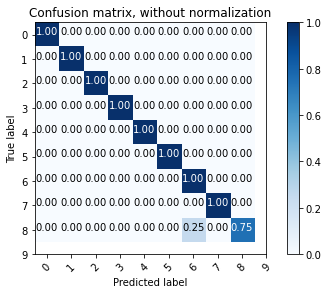

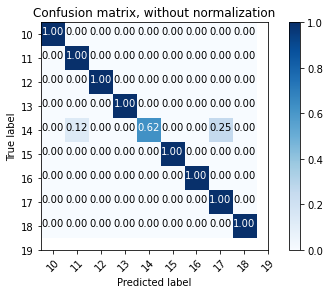

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 5 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10,1:10], classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))